In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# Build the vocabulary of characters and mapping to/from integers
chars = sorted(list(set(''.join(words)))) # All individual words in the dataset
stoi = {s:i+1 for i,s in enumerate(chars)} # String to integer mapping
stoi['.'] = 0 # In the vocabulary doen't exist the '.' character by default, we include it at the first position
itos = {i:s for s,i in stoi.items()} # Integer to string mapping
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
characters_integer = []
for ch in 'emma':
    characters_integer.append(stoi[ch])

print(torch.tensor(characters_integer))

tensor([ 5, 13, 13,  1])


In [6]:
# Build the dataset

block_size = 3 # Context length: how many characters do we take to predict the next one
X, Y = [], []
for w in words[:5]:
    print(w)
    # Creates a list with three elements, each of which is 0
    # This context list will be a sliding window always containing the previous three characters
    # in order to predict the next
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        # Our input data now will be a context of size three different to the context fo size one we builded
        # in the previous code lab
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [8]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

### Look-up table (Input layer)

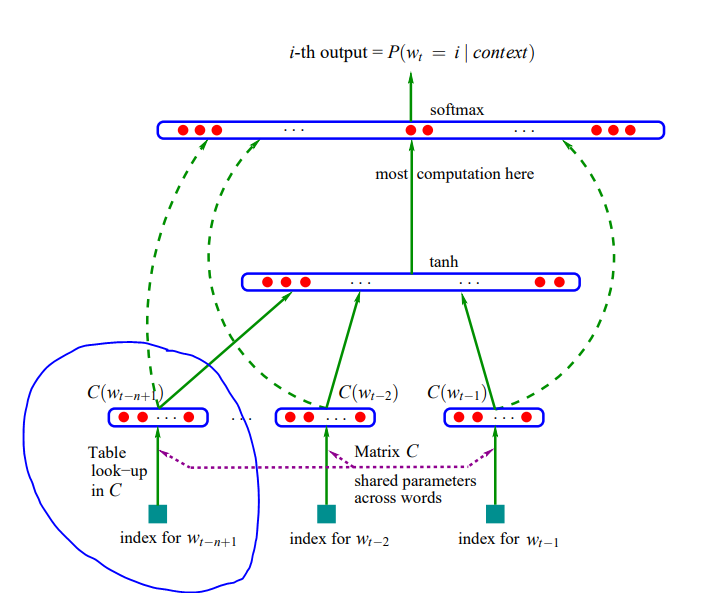

In [9]:
# We can interprete the embedding of the integer either as the integer indexing into a lookup table C
# or equivalently we can also think of this as a first layer of the NN

# The layers here has neurons that have non-linearity, there is no tanh just linear neurons
# and their weight matrix is C

In [10]:
# We have 27 possible characters and we're going to embed them in a lower dimensional space
# i.e. two-dimensional space

# Each of the 27 characters will have a two-dimensional embedding
C = torch.rand((27, 2))

In [11]:
C

tensor([[0.1710, 0.7386],
        [0.8496, 0.8717],
        [0.8329, 0.9072],
        [0.9338, 0.7440],
        [0.1552, 0.9574],
        [0.2289, 0.2643],
        [0.7792, 0.8417],
        [0.0559, 0.1163],
        [0.8220, 0.5726],
        [0.5447, 0.5688],
        [0.7347, 0.2217],
        [0.1913, 0.3838],
        [0.1043, 0.9848],
        [0.5892, 0.2100],
        [0.0549, 0.8291],
        [0.9189, 0.4836],
        [0.5454, 0.6078],
        [0.8109, 0.2107],
        [0.1325, 0.5449],
        [0.8623, 0.9391],
        [0.0786, 0.3118],
        [0.3716, 0.9268],
        [0.4471, 0.6407],
        [0.4716, 0.8965],
        [0.9404, 0.0074],
        [0.7874, 0.2886],
        [0.5506, 0.1474]])

In [12]:
C[5]

tensor([0.2289, 0.2643])

In [13]:
# The size of the left side matrix is 27
# The size of C is 27 X 2
# The result is 1 X 2
# We get the same values as above because the one-hot encoding's one is in the five position
# in the vocabulary which multiplied by the corresponding row 5 column 1 and column 2 then
# we have 1*0.7240, 1*0.0191
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.2289, 0.2643])

In [14]:
C[torch.tensor([[0, 0, 0],[0, 0, 5]])]

tensor([[[0.1710, 0.7386],
         [0.1710, 0.7386],
         [0.1710, 0.7386]],

        [[0.1710, 0.7386],
         [0.1710, 0.7386],
         [0.2289, 0.2643]]])

In [15]:
# This will produce the embedding for each of the 32 X 3 integers
C[X].shape

torch.Size([32, 3, 2])

In [16]:
# Here C[X] is performing advanced indexing, each element in X is used as an index
# to select a row from C
C[X][:2, :, :]

tensor([[[0.1710, 0.7386],
         [0.1710, 0.7386],
         [0.1710, 0.7386]],

        [[0.1710, 0.7386],
         [0.1710, 0.7386],
         [0.2289, 0.2643]]])

In [17]:
# Index in position (13, 2) of X is 1
X[13, 2]

tensor(1)

In [18]:
# Embedding of the value 1  
C[X][13, 2]

tensor([0.8496, 0.8717])

In [19]:
# The previous embedding match the value at C[1]
C[1]

tensor([0.8496, 0.8717])

In [20]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

### Hidden layer

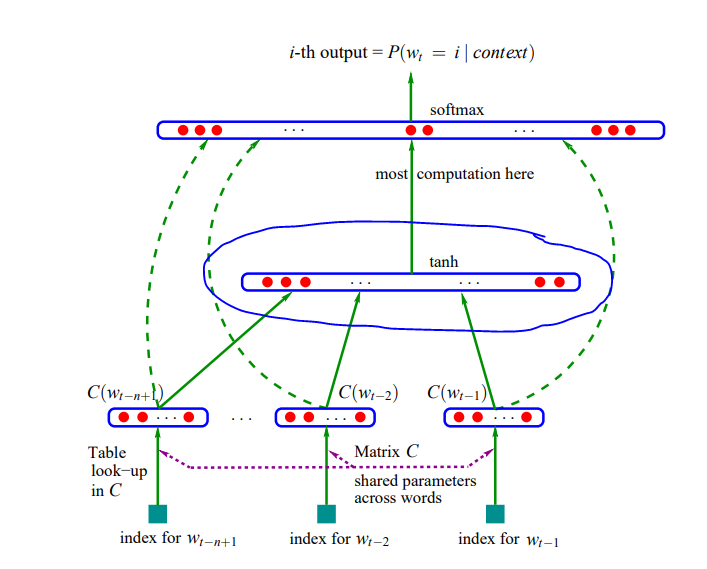

In [21]:
# Weights for hidden layer
# The number of inputs to this layer is going to be 3 * 2, because we have
# two dimensional embeddings and we have three of them (a dimensional embedding for each chracter)

# The number of neurons in the hidden layer is a variable up to us
W1 = torch.rand((6, 100))
b1 = torch.rand(100)

In [22]:
# emb.view(...) is a reshaping operation

# Before emb.view(32, 6) each of the 32 samples has 3 embeddings, and each embedding is a
# 2-dimensional vector.
# After emb.view(32, 6) each of the 32 samples is represented by a single 6-dimensional vector
# (3 embeddings concatenated)

h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)

In [23]:
h

tensor([[0.9156, 0.9940, 0.9762,  ..., 0.9679, 0.9322, 0.9833],
        [0.8992, 0.9859, 0.9721,  ..., 0.9398, 0.9061, 0.9842],
        [0.9167, 0.9823, 0.9664,  ..., 0.9041, 0.8832, 0.9810],
        ...,
        [0.9370, 0.9979, 0.9934,  ..., 0.9740, 0.9802, 0.9980],
        [0.9523, 0.9972, 0.9879,  ..., 0.9677, 0.9783, 0.9964],
        [0.9531, 0.9989, 0.9940,  ..., 0.9826, 0.9853, 0.9979]])

In [24]:
h.shape

torch.Size([32, 100])

### Output layer

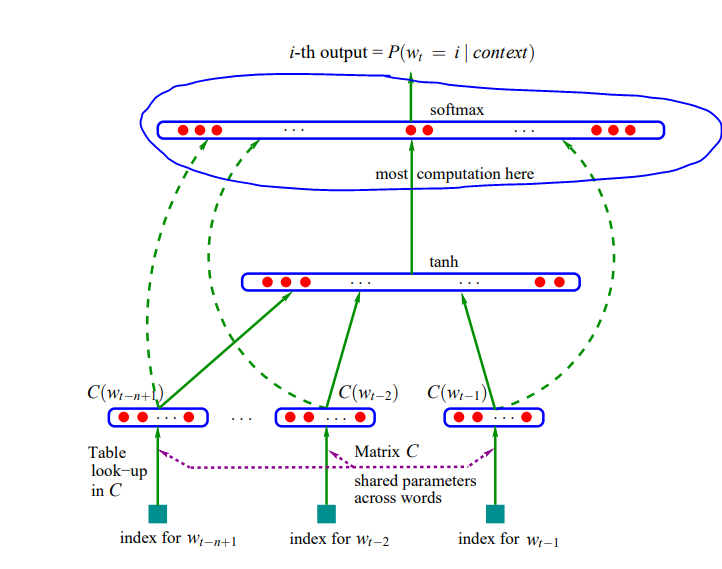

In [25]:
# The output number of the last layer will be 27 because we have 27
# possible characters
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [26]:
logits = h @ W2 + b2

In [27]:
logits.shape

torch.Size([32, 27])

In [28]:
logits

tensor([[-1.2494e+01, -3.1824e+00,  4.6470e-01,  3.4733e+00,  1.3046e+01,
         -1.8975e-01, -1.3854e+01,  2.3120e+00, -9.7400e+00,  5.7449e+00,
          3.7818e+00,  1.2744e+01, -4.2759e+00, -1.0084e+01,  1.0620e+01,
         -4.9998e+00, -2.1433e+01, -9.8676e+00, -1.5587e+00,  4.3251e+00,
          2.2107e+00, -6.7628e+00, -7.9258e+00,  5.7798e+00,  2.6607e+00,
          1.7577e+01,  7.0621e+00],
        [-1.2393e+01, -2.8433e+00,  2.5770e-01,  3.3903e+00,  1.2813e+01,
         -5.8603e-01, -1.3395e+01,  2.3064e+00, -8.8756e+00,  6.0466e+00,
          3.5780e+00,  1.2537e+01, -4.3323e+00, -9.8874e+00,  1.0199e+01,
         -5.0651e+00, -2.0894e+01, -1.0013e+01, -1.0518e+00,  3.9047e+00,
          1.9684e+00, -6.4686e+00, -7.2571e+00,  5.7462e+00,  2.8817e+00,
          1.6850e+01,  7.3189e+00],
        [-1.2135e+01, -3.1967e+00,  1.0444e-01,  4.2475e+00,  1.3116e+01,
         -4.5632e-01, -1.3664e+01,  2.3653e+00, -8.5206e+00,  6.0485e+00,
          3.8350e+00,  1.2248e+01, -4.81

In [29]:
# We want to exponentiate the logits to get our fake counts and then we want to normalize them into a probability
counts = logits.exp()

In [30]:
prob = counts / counts.sum(1, keepdims=True)

In [31]:
prob.shape

torch.Size([32, 27])

In [32]:
# Every row of prob sums to one ot it's normalized
prob[0].sum()

tensor(1.)

In [33]:
prob

tensor([[8.5535e-14, 9.4622e-10, 3.6301e-08, 7.3542e-07, 1.0562e-02, 1.8866e-08,
         2.1942e-14, 2.3025e-07, 1.3430e-12, 7.1299e-06, 1.0012e-06, 7.8144e-03,
         3.1703e-10, 9.5223e-13, 9.3428e-04, 1.5371e-10, 1.1215e-17, 1.1821e-12,
         4.7992e-09, 1.7237e-06, 2.0805e-07, 2.6366e-11, 8.2405e-12, 7.3827e-06,
         3.2631e-07, 9.8064e-01, 2.6616e-05],
        [1.9318e-13, 2.7124e-09, 6.0268e-08, 1.3821e-06, 1.7095e-02, 2.5921e-08,
         7.0959e-14, 4.6756e-07, 6.5094e-12, 1.9687e-05, 1.6676e-06, 1.2963e-02,
         6.1186e-10, 2.3667e-12, 1.2514e-03, 2.9404e-10, 3.9283e-17, 2.0874e-12,
         1.6270e-08, 2.3117e-06, 3.3344e-07, 7.2261e-11, 3.2843e-11, 1.4578e-05,
         8.3111e-07, 9.6858e-01, 7.0264e-05],
        [3.4662e-13, 2.6409e-09, 7.1681e-08, 4.5154e-06, 3.2094e-02, 4.0914e-08,
         7.5152e-14, 6.8751e-07, 1.2871e-11, 2.7345e-05, 2.9892e-06, 1.3468e-02,
         5.2540e-10, 3.4327e-12, 2.2645e-03, 3.3487e-10, 6.3399e-17, 2.9164e-12,
         2.9418e-

In [34]:
# We'd like to index the rows of prob and in each row we'd like pluck out the probability
# assigned to the correct character

In [35]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [36]:
# This operation selects one element from each row of `prob`, with the column index for each row
# specified by `Y`.
# In other words, for each sample (row) in `prob`, it picks out the probability of the actual
# next character (as given by `Y`)

# I.e. 
# If the firs element of `Y` is `5`, it selects the probability at position `[0, 5]` in `prob`
# if the second element of `Y` is `13` it selects the probability at position `[1, 13] in `prob` and so on.
prob[torch.arange(32), Y]

tensor([1.8866e-08, 2.3667e-12, 3.4327e-12, 2.9792e-09, 4.5813e-14, 1.5371e-10,
        2.4052e-10, 2.4096e-06, 2.5876e-12, 4.0225e-06, 4.8846e-10, 2.7720e-14,
        9.4622e-10, 2.4006e-12, 3.0644e-10, 1.9940e-14, 7.1299e-06, 1.0454e-06,
        2.7115e-10, 1.5177e-08, 5.0424e-09, 2.0782e-10, 2.1530e-10, 1.4467e-09,
        3.4468e-14, 1.7237e-06, 7.9425e-11, 2.6117e-18, 6.9367e-14, 1.5476e-06,
        3.3652e-10, 2.2439e-14])

### Loss function

In [42]:
# This is the negative log-likelihood loss
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.7617)